In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load your dataset
file_path = 'car_sales.csv'
data = pd.read_csv(file_path)



# Display the first few rows of the dataset to get an idea of its structure print(data.head(30))

In [16]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#load youir dataset
data = pd.read_csv('car_sales.csv')

data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   156 non-null    object 
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        156 non-null    object 
 15  Power_perf_factor    155 non-null    flo

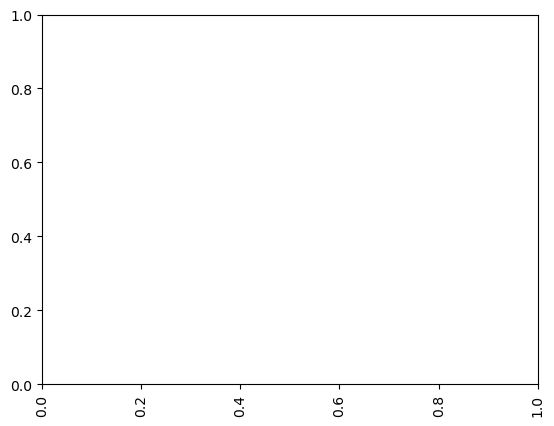

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

column1 = ['__year_resale_value','Price_in_thousands','Curb_weight','Power_perf_factor','Engine_size','Horsepower','Wheelbase','Width','Length','Fuel_capacity','Fuel_efficiency']
column2 = 'Sales_in_thousands'
plt.xticks(rotation =450)
plt.show()

In [23]:
col = ['Price_in_thousands','Horsepower','__year_resale_value','Fuel_capacity','Fuel_efficiency','Power_perf_factor']
zero_not_accepted = ['__year_resale_value','Price_in_thousands','Curb_weight','Power_perf_factor','Engine_size','Horsepower','Wheelbase','Width','Length','Fuel_capacity','Fuel_efficiency']

for col in zero_not_accepted:
    data[col] = data[col].replace(0,np.NaN)
    data[col] = data[col].replace(np.NaN)
    
    missing_values = data.isnull().sum()
print(missing_values)

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          1
Power_perf_factor      0
dtype: int64


<Axes: >

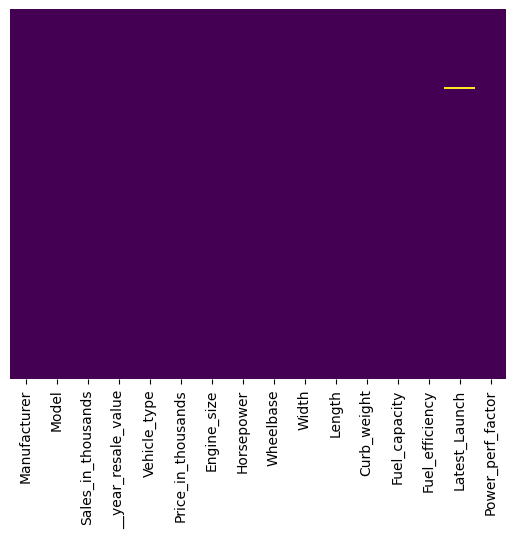

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [27]:
# Assuming you have a column 'Car_Sales' as the target variable, and other columns as features
X = data[['Fuel_efficiency', 'Engine_size', 'Horsepower', 'Fuel_capacity', 'Power_perf_factor']]
y = data['Sales_in_thousands']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#To know the shape of X_train
print(X_train.shape)

print(y_train.head(30))


(125, 5)
136    142.535
55     220.650
124      8.982
84      11.337
105     42.574
42      31.038
67      55.557
127      9.191
26      21.855
135     33.028
78      22.925
148      9.569
36       4.734
76      13.798
22      42.593
132      8.472
140     84.087
11      39.350
79      26.232
68      80.556
149      5.596
27     107.995
86      14.351
118     51.645
41      16.767
4       20.397
32      13.462
60      12.855
101     42.643
66      15.467
Name: Sales_in_thousands, dtype: float64


In [34]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score: {r2}")



Mean Squared Error: 8980.253335593408
R-squared (R2) Score: {r2}


In [35]:
print(y_pred)

[ 4.12901651 65.63227458 54.61202184 44.32624947 31.35941413 50.52031914
 11.96364902 36.96437999 26.89096849 56.04367475 63.91202099 57.33562009
 22.7143057  53.62286739  4.88969889 44.39671846  5.21337869 55.60698521
 31.92664493 38.67984234 48.42811443 54.59891243 44.72028436 45.71536226
 62.06451981 59.24286371 50.27307163 47.16241856 63.89422183 34.40424488
 63.64807559 36.6838117 ]


In [36]:
X_test.head(1)

,Fuel_efficiency,Engine_size,Horsepower,Fuel_capacity,Power_perf_factor
126,23.0,3.4,300.0,17.0,135.91471


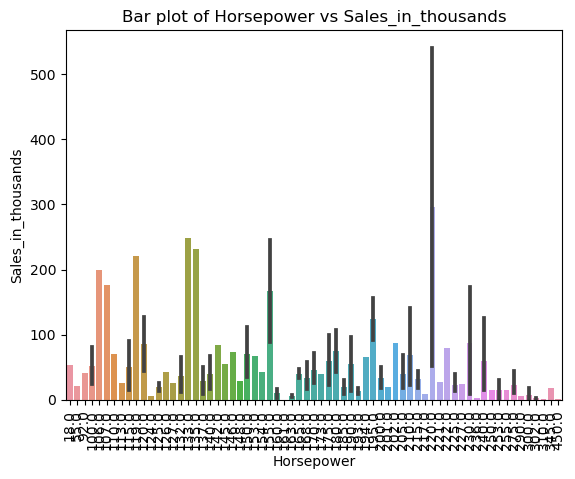

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

column1 = 'Horsepower'
column2 = 'Sales_in_thousands'
sns.barplot(x=column1, y = column2, data= data)
plt.title('Bar plot of {} vs {}'. format(column1,column2))
plt.xlabel(column1)
plt.ylabel(column2)


plt.xticks(rotation = 90)
plt.show()

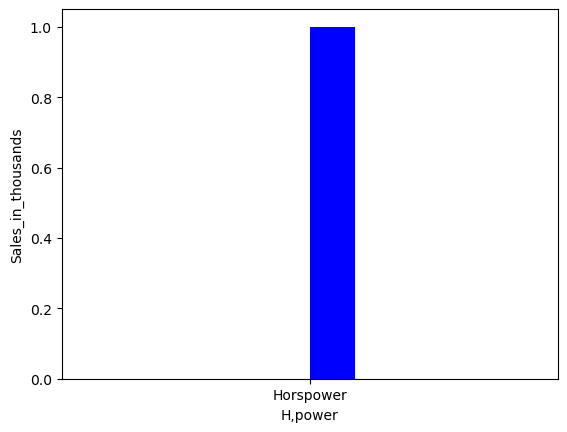

In [39]:
bins = [0,20,40,60,80,100,120,140,160,180,200]
plt.hist(x = 'Horspower', color = 'b', rwidth = 45, histtype = 'barstacked')
plt.ylabel('Sales_in_thousands')
plt.xlabel('H,power')
plt.show()
#plt.xticks(rotation = 90)
#plt.show()

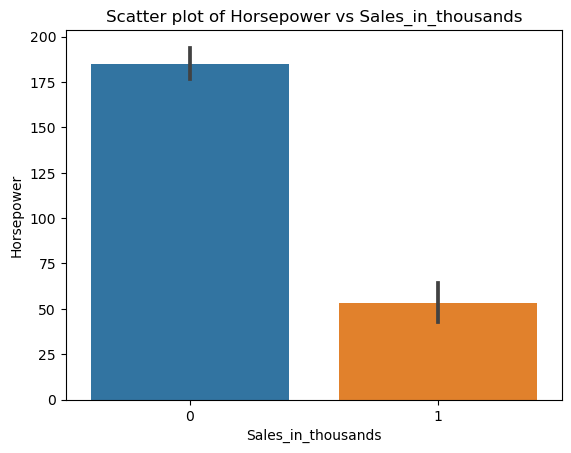

In [40]:
import matplotlib.pyplot as plt

#sns.figure(figsize=(10, 10))
sns.barplot((data['Horsepower'], data['Sales_in_thousands']))
plt.xlabel(('Sales_in_thousands'))
plt.ylabel('Horsepower')
plt.title('Scatter plot of Horsepower vs Sales_in_thousands')

plt.show()


In [46]:
prediction = model.predict([[23.0, 3.4, 300.0,17,135.988]])
prediction

C:\Users\NAVEEN VAJA\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.08225073])

In [51]:
prediction = model.predict([[2.0,2.3,100.0,13.9,78.9]])
prediction

C:\Users\NAVEEN VAJA\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.5278073])